In [1]:
!pip install torch==2.3.0 torchvision
!pip install opencv-python supervision matplotlib

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 811.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 

In [2]:
!which nvcc

/usr/local/cuda/bin/nvcc


In [3]:
import os
os.environ["CUDA_HOME"] = "/usr/local/cuda"

In [4]:
!echo $CUDA_HOME

/usr/local/cuda


In [5]:
!git clone https://github.com/facebookresearch/sam2.git

Cloning into 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (381/381), done.


In [6]:
!pip install -e /content/sam2


Obtaining file:///content/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using ca

In [7]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [8]:
#RESTART SESSION AFTER RUNNING THE PREVIOUS CELL IF PROMPTED. You can then run the rest of the cells normally

In [9]:
%cd /content
!mkdir weights
%cd weights

/content
/content/weights


In [10]:
!wget -O sam2_hiera_large.pt https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

--2025-10-04 22:24:30--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.144.13, 18.154.144.102, 18.154.144.87, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.154.144.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897952466 (856M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_large.pt’

sam2_hiera_large.pt 100%[===================>] 856.35M   157MB/s    in 8.9s    

2025-10-04 22:24:39 (96.6 MB/s) - ‘sam2_hiera_large.pt’ saved [897952466/897952466]



In [11]:
%cd ..

/content


Saving f1.jpg to f1.jpg


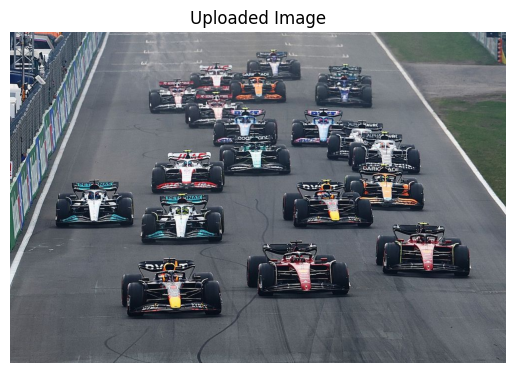

In [22]:
from google.colab import files
uploaded = files.upload()

IMAGE_PATH = list(uploaded.keys())[0]

from PIL import Image
img = Image.open(IMAGE_PATH).convert("RGB")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [25]:
from transformers import GroundingDinoProcessor, GroundingDinoForObjectDetection
import torch
from PIL import Image

processor = GroundingDinoProcessor.from_pretrained("IDEA-Research/grounding-dino-base")
model = GroundingDinoForObjectDetection.from_pretrained("IDEA-Research/grounding-dino-base")

if torch.cuda.is_available():
    model = model.cuda()

image = Image.open(IMAGE_PATH).convert("RGB")
prompt = input("Enter the prompt for object detection: ")

inputs = processor(images=image, text=prompt, return_tensors="pt")
inputs = {k: v.to(model.device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]], device=model.device)
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs["input_ids"],
    0.10,
    0.10,
    target_sizes=[image.size[::-1]]
)[0]

print("Boxes:", results["boxes"])
print("Scores:", results["scores"])
print("Labels:", results["labels"])


Enter the prompt for object detection: formula car
Boxes: tensor([[222.9233, 454.7373, 428.5529, 574.5817],
        [475.3746, 418.7012, 685.5185, 532.5275],
        [ 90.6084, 297.7447, 250.2181, 393.0260],
        [736.0347, 382.2408, 929.1533, 492.6806],
        [262.3843, 324.4396, 432.5049, 425.3132],
        [548.6104, 292.6962, 732.6520, 394.1652],
        [284.5701, 236.7811, 432.9829, 324.9830],
        [674.4500, 279.7042, 835.8185, 358.7913],
        [614.9508,  64.2748, 730.4590, 150.8918],
        [476.9531,  34.3857, 585.7521,  95.8766],
        [422.5332, 222.7099, 565.4597, 287.5620],
        [408.2269, 154.3691, 539.2194, 230.1552],
        [279.2371,  57.6721, 556.7861, 164.4632],
        [683.8946, 217.3944, 827.4024, 286.4089],
        [566.8854, 153.6064, 674.0620, 230.4377],
        [351.7445, 135.2632, 475.4471, 192.0488],
        [566.4421, 153.0097, 750.9315, 230.9879]], device='cuda:0')
Scores: tensor([0.2952, 0.2558, 0.2563, 0.2391, 0.2235, 0.2126, 0.1773, 0.

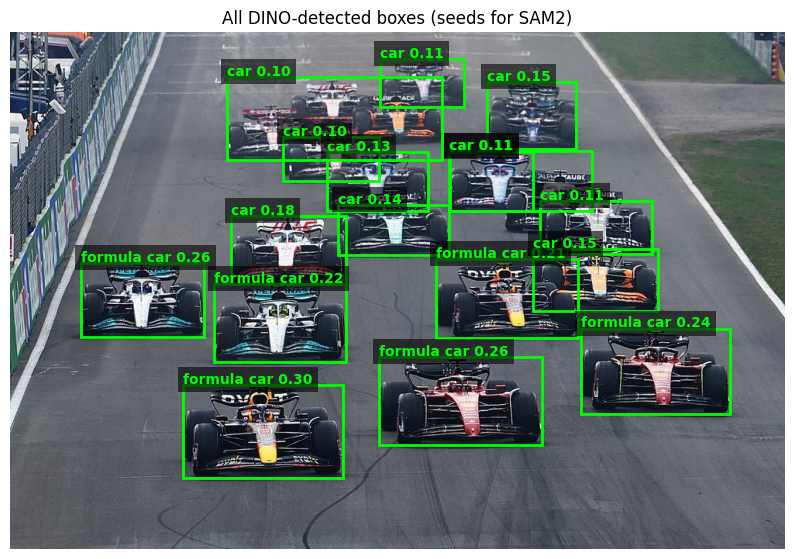

In [26]:
import matplotlib.pyplot as plt
import numpy as np


boxes = results["boxes"]
scores = results["scores"] if "scores" in results else None
labels = results["labels"] if "labels" in results else []

if hasattr(boxes, "cpu"):
    boxes = boxes.cpu().numpy()
if scores is not None and hasattr(scores, "cpu"):
    scores = scores.cpu().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(np.array(img))
ax = plt.gca()

for i, box in enumerate(boxes):
    x0, y0, x1, y1 = box
    if scores is not None and scores[i] < 0.1:
        continue
    rect = plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='lime', linewidth=2, fill=False)
    ax.add_patch(rect)
    label = str(labels[i]) if i < len(labels) else ""
    if scores is not None:
        plt.text(
            x0, y0 - 2,
            f"{label} {scores[i]:.2f}" if label else f"{scores[i]:.2f}",
            color='lime', fontsize=10, weight='bold',
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none')
        )
    elif label:
        plt.text(
            x0, y0 - 2,
            label,
            color='lime', fontsize=10, weight='bold',
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none')
        )

plt.title("All DINO-detected boxes (seeds for SAM2)")
plt.axis('off')
plt.show()


In [27]:
%cd /content

/content


In [28]:
import_guard_file = "/content/sam2/sam2/build_sam.py"

with open(import_guard_file, 'r') as f:
    content = f.read()

patched_content = content.replace(
    'if os.path.isdir(os.path.join(sam2.__path__[0], "sam2")):',
    'if False:  # PATCHED - disabled directory check'
)

with open(import_guard_file, 'w') as f:
    f.write(patched_content)

print("Patched build_sam.py")


Patched build_sam.py


In [29]:
import sys
modules_to_remove = [k for k in sys.modules.keys() if k.startswith('sam2')]
for mod in modules_to_remove:
    del sys.modules[mod]

sys.path.insert(0, '/content/sam2')


In [30]:
import os
sys.path.insert(0, '/content/sam2/sam2')

os.chdir('/content/sam2/sam2')

from build_sam import build_sam2
from sam2_image_predictor import SAM2ImagePredictor


In [31]:
SAM2_CONFIG = "/configs/sam2/sam2_hiera_l.yaml"
SAM2_WEIGHTS = "/content/weights/sam2_hiera_large.pt"
DEVICE = "cuda"
sam2_model = build_sam2(SAM2_CONFIG, ckpt_path=SAM2_WEIGHTS, device=DEVICE)
predictor = SAM2ImagePredictor(sam2_model)


In [32]:
img_np = np.array(img)
predictor.set_image(img_np)

masks, scores, logits = predictor.predict(
    box=boxes,
    multimask_output= False
)

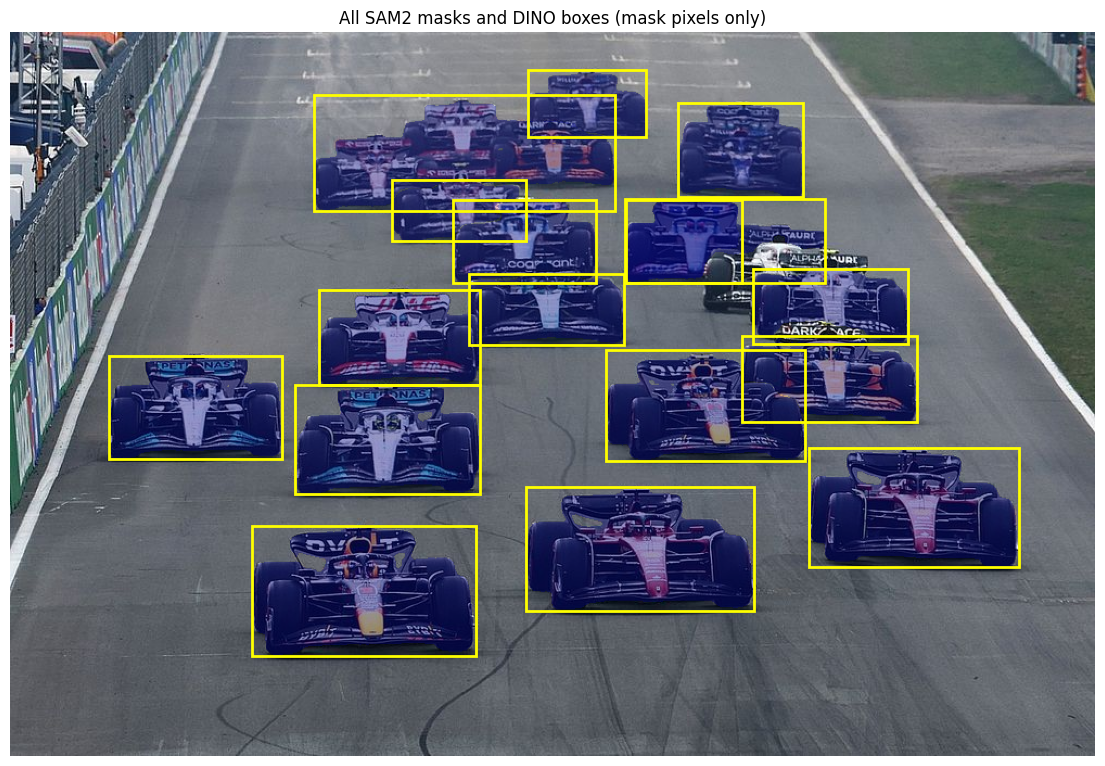

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))
plt.imshow(np.array(img))

for i in range(len(masks)):
    mask_rgb = np.ma.masked_where(masks[i] == 0, masks[i])
    plt.imshow(mask_rgb.squeeze(), cmap='jet', alpha=0.4)

    x0, y0, x1, y1 = boxes[i]
    plt.gca().add_patch(
        plt.Rectangle((x0, y0), x1-x0, y1-y0, edgecolor='yellow', linewidth=2, fill=False)
    )

plt.title("All SAM2 masks and DINO boxes (mask pixels only)")
plt.axis('off')
plt.show()
